<a href="https://colab.research.google.com/github/jecordjotse/hamoye/blob/master/Planet_Amazon_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import keras as k
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import fbeta_score

In [ ]:
import gc

In [ ]:
import sys
import os
import subprocess
import scipy

In [ ]:
import cv2
import zipfile
import shutil
from tqdm import tqdm
import zipfile

In [ ]:
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

## Load Files

In [ ]:
# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/kaggle.json
 
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle competitions download -c planet-understanding-the-amazon-from-space

  0% 0.00/600k [00:00<?, ?B/s]
100% 600k/600k [00:00<00:00, 83.7MB/s]
  0% 0.00/148k [00:00<?, ?B/s]
100% 148k/148k [00:00<00:00, 45.6MB/s]
  0% 0.00/151k [00:00<?, ?B/s]
100% 151k/151k [00:00<00:00, 48.8MB/s]
  0% 0.00/1.01M [00:00<?, ?B/s]
100% 1.01M/1.01M [00:00<00:00, 142MB/s]
  0% 0.00/1.52M [00:00<?, ?B/s]
100% 1.52M/1.52M [00:00<00:00, 103MB/s]


In [ ]:
with zipfile.ZipFile('/content/train_v2.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('./data')

In [ ]:
!apt-get install p7zip-full

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


In [ ]:
!wget -O train-jpg.tar.7z "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/6322/868312/upload/train-jpg.tar.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1600666484&Signature=IId%2FK6jF8AkORMw1MPMEU6xHMKdte2GlmHcfCIXziSE9J4kWJuUGkB%2Fu5tfdJhk3DyVqxorfBfsbQzf1Nz%2BWdllG65%2FgYMyzJPYb7FK4z46JVAqIN3gQdTsLGYKzh63SUdgRDvGm399z4HXX%2B9CUHIjELoilbGOwowU10TbD4lUZen2v1CEb1rODzrYVxCdcywPti93P7J21lgHoxp%2Fa1w4Y616ty1X6oGC908ON0awjkUrMN0%2BVAQe51iI%2Ben0tJ1Is%2B8CJtyYYNRGfxbAL0ksPx2o9dSAynrH4VR2DIs%2FgZnp4rbpGXpDUs6sturC%2Byi%2FijZ9iJNAXOFMOxGyOTw%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain-jpg.tar.7z"
!p7zip -d  train-jpg.tar.7z
!tar -xvf train-jpg.tar
!mv /content/train-jpg/ /content/data/train_jpg/

Streaming output truncated to the last 5000 lines.
train-jpg/train_18344.jpg
train-jpg/train_27704.jpg
train-jpg/train_7979.jpg
train-jpg/train_13032.jpg
train-jpg/train_35254.jpg
train-jpg/train_30338.jpg
train-jpg/train_27364.jpg
train-jpg/train_20550.jpg
train-jpg/train_15082.jpg
train-jpg/train_34316.jpg
train-jpg/train_35048.jpg
train-jpg/train_35424.jpg
train-jpg/train_5090.jpg
train-jpg/train_5713.jpg
train-jpg/train_39060.jpg
train-jpg/train_11864.jpg
train-jpg/train_36277.jpg
train-jpg/train_14203.jpg
train-jpg/train_12909.jpg
train-jpg/train_12433.jpg
train-jpg/train_37809.jpg
train-jpg/train_6081.jpg
train-jpg/train_32372.jpg
train-jpg/train_34065.jpg
train-jpg/train_2274.jpg
train-jpg/train_20986.jpg
train-jpg/train_3903.jpg
train-jpg/train_4412.jpg
train-jpg/train_21703.jpg
train-jpg/train_5448.jpg
train-jpg/train_20568.jpg
train-jpg/train_5143.jpg
train-jpg/train_3306.jpg
train-jpg/train_17657.jpg
train-jpg/train_22337.jpg
train-jpg/train_5173.jpg
train-jpg/train_19085.jp

In [ ]:
!wget -O test-jpg-additional.tar.7z "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/6322/868312/upload/test-jpg-additional.tar.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1600666451&Signature=s8VsvB%2Fb7Ze141B46tyqQcvjdGAQsB8SgZA7q3AL%2F2kYTLDqD5jSF%2BAnaa3%2Fr25JtbMjkqZZ61TXl5rGRWNwImjWCD5%2B2g%2FdRgBx%2BkGgMYyiwzNMMOb8VUxwaPyNLmVjgmj01YfxvVBGd7tqFfnLeIwwLTBR39xKUGHdefvG5Y3kq3MjYzDxnnC3HYGwOSwTk%2BxR0t%2FkWYDi%2F07go1HkJiEMIyBA2h2ckkKkU53%2FqmFRojABcyDXOEfJscX7gTi%2FFK0tADKBog5Rg%2FOW91NWIl287tXnhe1IsN8QnPdHytCYVL8VkacndACSBUIQGRFbSNVbsAc68ujGmP%2Bj3yeUrQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dtest-jpg-additional.tar.7z"
!p7zip -d  test-jpg-additional.tar.7z
!tar -xvf test-jpg-additional.tar
!mv /content/test-jpg-additional/ /content/data/test_jpg_additional/

Streaming output truncated to the last 5000 lines.
test-jpg-additional/file_18722.jpg
test-jpg-additional/file_14432.jpg
test-jpg-additional/file_13649.jpg
test-jpg-additional/file_10387.jpg
test-jpg-additional/file_16665.jpg
test-jpg-additional/file_17888.jpg
test-jpg-additional/file_1202.jpg
test-jpg-additional/file_12962.jpg
test-jpg-additional/file_17577.jpg
test-jpg-additional/file_12112.jpg
test-jpg-additional/file_12187.jpg
test-jpg-additional/file_9150.jpg
test-jpg-additional/file_11882.jpg
test-jpg-additional/file_6074.jpg
test-jpg-additional/file_14679.jpg
test-jpg-additional/file_19318.jpg
test-jpg-additional/file_7931.jpg
test-jpg-additional/file_3081.jpg
test-jpg-additional/file_18595.jpg
test-jpg-additional/file_20167.jpg
test-jpg-additional/file_1772.jpg
test-jpg-additional/file_15527.jpg
test-jpg-additional/file_11209.jpg
test-jpg-additional/file_3368.jpg
test-jpg-additional/file_4063.jpg
test-jpg-additional/file_14129.jpg
test-jpg-additional/file_14152.jpg
test-jpg-add

In [ ]:
!wget -O test-jpg.tar.7z "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/6322/868312/upload/test-jpg.tar.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1600666405&Signature=rj8AflVPzV9Y9I74tU01ISSt2PWjWs1maHC059YZsrB0N0VoeYVb%2BvqYMhLTTw3IhuneKpLI2uD4CwuhYtkLv2k%2BZvvOqJ32Zi4NuXRhGUs%2FEsNmugxaDgF%2BP9a7vwbhGBcZ4CaE1PmO%2FZRuv8TzKs8Yqiqhqru81GpRFse3lcrQO%2FjLBKd0On%2FSft%2BU%2Fl7yao9TybJN2GvxFMLWhydTd3N3%2BmfFq7ZweXlULuXGNouvSi5KXHEIbG94e3IuoYKE%2FK8o5did3ySEYq4LII5%2Fz8FdIKXYoPZuaBz%2B8l0%2FJDnLunw5LGjByIeV%2BPrr9VtSQsaasarOLYYWvDtLjrISQA%3D%3D&response-content-disposition=attachment%3B+filename%3Dtest-jpg.tar.7z"
!p7zip -d  test-jpg.tar.7z
!tar -xvf test-jpg.tar
!mv /content/test-jpg/ /content/data/test_jpg/

Streaming output truncated to the last 5000 lines.
test-jpg/test_5846.jpg
test-jpg/test_23452.jpg
test-jpg/test_29660.jpg
test-jpg/test_26080.jpg
test-jpg/test_15427.jpg
test-jpg/test_20949.jpg
test-jpg/test_40230.jpg
test-jpg/test_290.jpg
test-jpg/test_11894.jpg
test-jpg/test_33737.jpg
test-jpg/test_18540.jpg
test-jpg/test_38600.jpg
test-jpg/test_22232.jpg
test-jpg/test_27540.jpg
test-jpg/test_23382.jpg
test-jpg/test_5175.jpg
test-jpg/test_6384.jpg
test-jpg/test_6898.jpg
test-jpg/test_35807.jpg
test-jpg/test_25806.jpg
test-jpg/test_21695.jpg
test-jpg/test_5548.jpg
test-jpg/test_29045.jpg
test-jpg/test_26617.jpg
test-jpg/test_19300.jpg
test-jpg/test_17307.jpg
test-jpg/test_19355.jpg
test-jpg/test_25582.jpg
test-jpg/test_2310.jpg
test-jpg/test_4504.jpg
test-jpg/test_17202.jpg
test-jpg/test_1013.jpg
test-jpg/test_31079.jpg
test-jpg/test_35040.jpg
test-jpg/test_12529.jpg
test-jpg/test_5820.jpg
test-jpg/test_6484.jpg
test-jpg/test_20172.jpg
test-jpg/test_16992.jpg
test-jpg/test_37793.jpg
t

In [ ]:
ROOT = os.path.abspath("./data/")
LABEL_CSV = os.path.join(ROOT, 'train_v2.csv')
JPEG_PATH = os.path.join(ROOT, 'train_jpg')
assert os.path.exists(ROOT)
assert os.path.exists(LABEL_CSV)
assert os.path.exists(JPEG_PATH)

## Exploratory Data Analysis

In [ ]:
labels_df = pd.read_csv('/content/data/train_v2.csv')
labels_df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [ ]:
# Build list with unique labels
labels = []
for tags in labels_df.tags.values:
    tag_labels = tags.split(' ')
    for label in tag_labels:
        if label not in labels:
            labels.append(label)

In [ ]:
labels

['haze',
 'primary',
 'agriculture',
 'clear',
 'water',
 'habitation',
 'road',
 'cultivation',
 'slash_burn',
 'cloudy',
 'partly_cloudy',
 'conventional_mine',
 'bare_ground',
 'artisinal_mine',
 'blooming',
 'selective_logging',
 'blow_down']

In [ ]:
#one hot encoding
for label in labels:
    labels_df[label] = labels_df['tags'].apply(lambda x: 1 if label in x.split(' ') else 0)
# Display head
labels_df.head()

,image_name,tags,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
0,train_0,haze primary,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,train_1,agriculture clear primary water,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,train_2,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,train_3,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,train_4,agriculture clear habitation primary road,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0


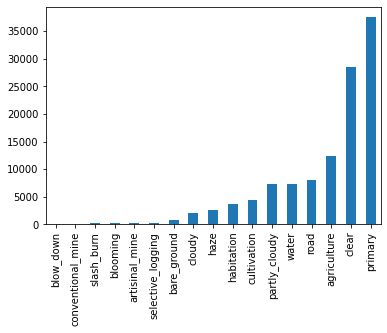

In [ ]:
# Histogram of label instances
labels_df[labels].sum().sort_values().plot.bar()

,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
haze,2697,2670,672,0,613,129,394,202,3,0,0,2,41,5,4,5,0
primary,2670,37513,11972,27668,7001,3469,7728,4455,209,0,7175,94,683,324,332,340,98
agriculture,672,11972,12315,9150,2712,2737,6034,3377,119,0,2493,24,225,38,32,65,22
clear,0,27668,9150,28431,5502,3090,6295,3527,173,0,0,70,747,307,311,308,85
water,613,7001,2712,5502,7411,915,2125,868,24,0,1295,26,206,299,16,49,3
habitation,129,3469,2737,3090,915,3660,2786,895,41,0,441,36,163,29,4,13,3
road,394,7728,6034,6295,2125,2786,8071,1294,36,0,1382,59,323,110,10,151,2
cultivation,202,4455,3377,3527,868,895,1294,4477,126,0,748,4,89,18,35,58,8
slash_burn,3,209,119,173,24,41,36,126,209,0,33,0,10,0,2,2,2
cloudy,0,0,0,0,0,0,0,0,0,2089,0,0,0,0,0,0,0


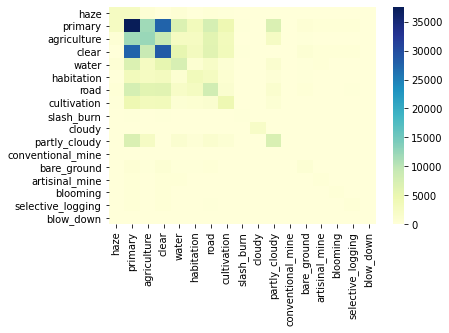

In [ ]:
numeric_df = labels_df[labels]; 
c_matrix = numeric_df.T.dot(numeric_df)
sns.heatmap(c_matrix,  cmap="YlGnBu")
c_matrix

In [ ]:
label_map = {l: i for i, l in enumerate(labels)}
inv_label_map = {i: l for l, i in label_map.items()}

In [ ]:
pd.Series(label_map)

haze                  0
primary               1
agriculture           2
clear                 3
water                 4
habitation            5
road                  6
cultivation           7
slash_burn            8
cloudy                9
partly_cloudy        10
conventional_mine    11
bare_ground          12
artisinal_mine       13
blooming             14
selective_logging    15
blow_down            16
dtype: int64

In [ ]:
pd.Series(inv_label_map)

0                  haze
1               primary
2           agriculture
3                 clear
4                 water
5            habitation
6                  road
7           cultivation
8            slash_burn
9                cloudy
10        partly_cloudy
11    conventional_mine
12          bare_ground
13       artisinal_mine
14             blooming
15    selective_logging
16            blow_down
dtype: object

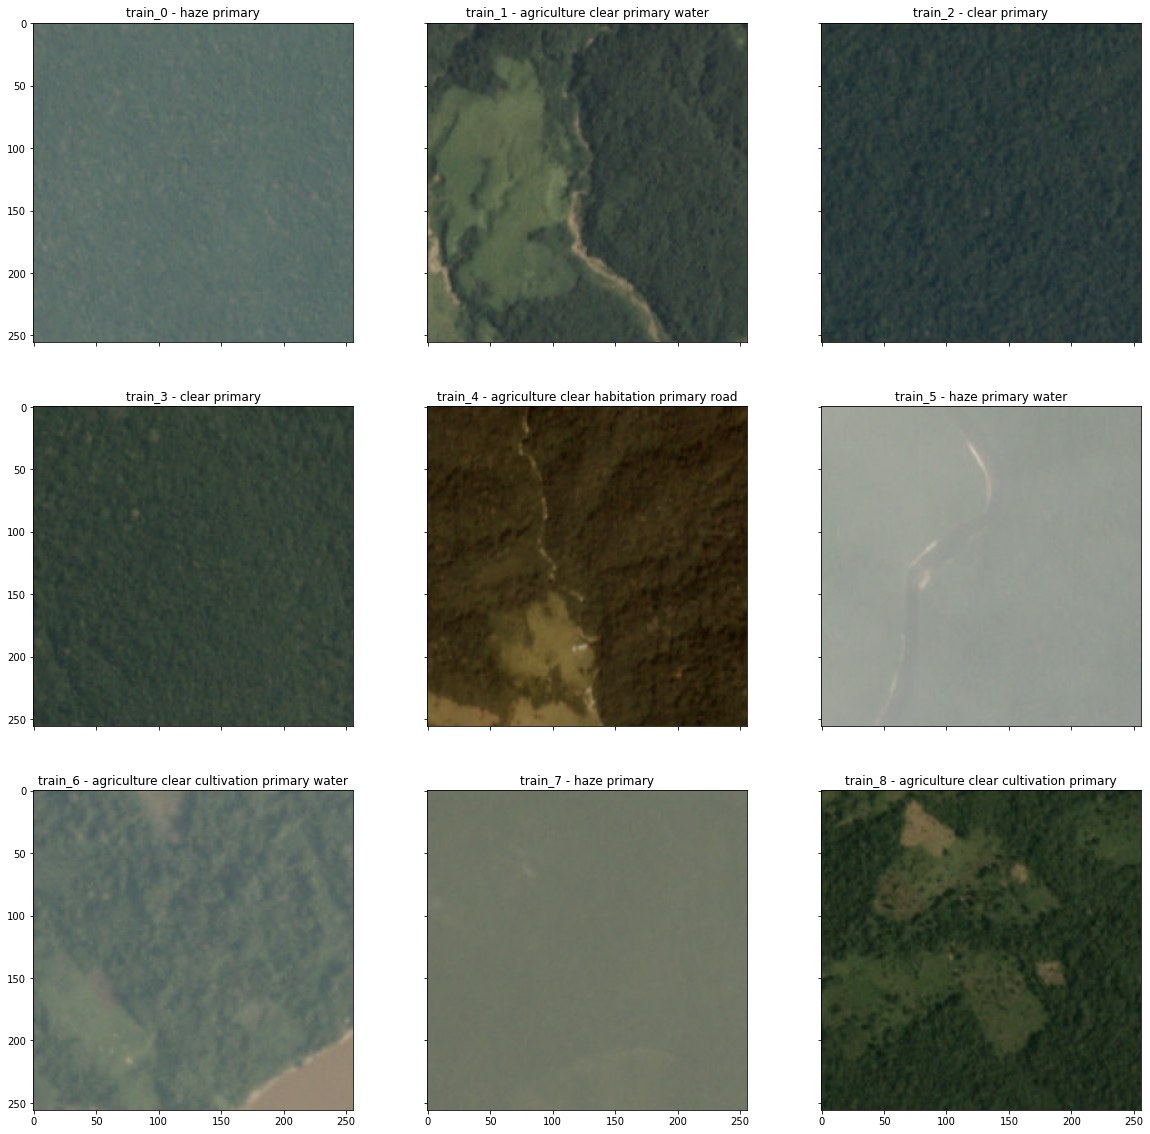

In [ ]:
new_style = {'grid': False}
plt.rc('axes', **new_style)
_, ax = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(20, 20))
i = 0
for f, l in labels_df[:9][['image_name','tags']].values:
    img = cv2.imread('/content/data/train_jpg/{}.jpg'.format(f))
    ax[i // 3, i % 3].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[i // 3, i % 3].set_title('{} - {}'.format(f, l))
    i += 1
    
plt.show()

## Training

In [ ]:
x_train = []
y_train = []
training = []
outcome = []
x_valid = []
y_valid = []

In [ ]:
samp = 40000
pix = 64

In [ ]:
for f, tags in tqdm(labels_df.sample(samp)[['image_name','tags']].values, miniters=1000): 
    img = cv2.imread('/content/data/train_jpg/{}.jpg'.format(f))
    targets = np.zeros(17)
    for t in tags.split(' '):
        targets[label_map[t]] = 1 
    x_train.append(cv2.resize(img, (pix, pix)))
    y_train.append(targets)

100%|██████████| 40000/40000 [00:44<00:00, 889.85it/s]


In [ ]:
#model = 0
gc.collect()

96

In [ ]:
y_train = np.array(y_train, np.uint8)
x_train = np.array(x_train, np.float16) / 255.0

In [ ]:
split = int(0.8*samp)
x_train, x_valid, y_train, y_valid = x_train[:split], x_train[split:], y_train[:split], y_train[split:]

In [ ]:
x_valid = np.asarray(x_valid)
y_valid = np.asarray(y_valid)

In [ ]:
np.asarray(x_train).shape

(32000, 64, 64, 3)

In [ ]:
split = 10000
training, x_train, outcome, y_train = x_train[:split], x_train[split:], y_train[:split], y_train[split:]

In [ ]:
training = np.asarray(training)
outcome = np.asarray(outcome)

In [ ]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

#### Data Augementation

In [ ]:
datagen = ImageDataGenerator(rotation_range=90)
datagen.fit(x_train)
batch_01 = datagen.flow(x_train, y_train, batch_size=500)

In [ ]:
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
datagen.fit(x_train)
batch_02 = datagen.flow(x_train, y_train, batch_size=500)

In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
datagen.fit(x_train)  
batch_03 = datagen.flow(x_train, y_train, batch_size=500)

#### make more data

In [ ]:
batch = batch_01.next()
training = np.concatenate((training, batch[0]))
outcome = np.concatenate((outcome, batch[1]))

In [ ]:
batch = batch_02.next()
training = np.concatenate((training, batch[0]))
outcome = np.concatenate((outcome, batch[1]))

In [ ]:
batch = batch_03.next()
training = np.concatenate((training, batch[0]))
outcome = np.concatenate((outcome, batch[1]))

#### the model

In [ ]:
outcome.shape

(56500, 17)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(pix, pix, 3)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.35))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(17, activation='sigmoid'))

model.compile(loss='binary_crossentropy', # We NEED binary here, since categorical_crossentropy l1 norms the output before calculating loss.
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(training, outcome,
          batch_size=500,
          epochs=10,
          verbose=1,
          validation_data=(x_valid, y_valid))

Epoch 1/10
113/113 [==============================] - 1976s 17s/step - loss: 0.2787 - accuracy: 0.8151 - val_loss: 0.2045 - val_accuracy: 0.8851
Epoch 2/10


In [ ]:
np.asarray(x_train[1:5]).shape

(4, 64, 64, 3)

In [ ]:
np.asarray(y_train[1:5]).shape

(4, 17)

In [ ]:
gc.collect()

In [ ]:
p_valid = model.predict(np.asarray(x_valid))
print(fbeta_score(np.asarray(y_valid), (np.array(p_valid) > 0.2).astype(int), beta=2, average='samples'))

0.8568609679845371


In [ ]:
x_train = []
y_test = []

In [ ]:
x_test = []
text_filename = []

In [ ]:
x_test = []
folder="/content/data/test_jpg"
for filename in tqdm(os.listdir(folder), miniters=1000):
    img = cv2.imread(os.path.join(folder,filename))
    x_test.append(cv2.resize(img, (pix, pix)))
    text_filename.append(filename.split('.')[0])

100%|██████████| 40669/40669 [00:51<00:00, 797.16it/s]


In [ ]:
folder="/content/data/test_jpg_additional"
for filename in tqdm(os.listdir(folder), miniters=1000):
    img = cv2.imread(os.path.join(folder,filename))
    x_test.append(cv2.resize(img, (pix, pix)))
    text_filename.append(filename.split('.')[0])

100%|██████████| 20522/20522 [00:29<00:00, 692.23it/s]


In [ ]:
x_test = np.array(x_test, np.float16) / 255.0
y_test = model.predict(np.asarray(x_test), batch_size=128)

In [ ]:
y_test = (np.array(y_test) > 0.2).astype(int)

In [ ]:
np.asarray(x_test).shape

(61191, 32, 32, 3)

In [ ]:
y_test

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]])

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

In [ ]:
!cp model.h5 model.json /content/drive/My\ Drive/Data\ Sets/

### Assemble Labels

In [ ]:
inv_label_map = pd.Series(inv_label_map)

In [ ]:
inv_label_map

0                  haze
1               primary
2           agriculture
3                 clear
4                 water
5            habitation
6                  road
7           cultivation
8            slash_burn
9                cloudy
10        partly_cloudy
11    conventional_mine
12          bare_ground
13       artisinal_mine
14             blooming
15    selective_logging
16            blow_down
dtype: object

In [ ]:
np.asarray(np.asarray(y_test[0]) * pd.Series(labels) )

array(['', 'primary', '', 'clear', '', '', '', '', '', '', '', '', '', '',
       '', '', ''], dtype=object)

In [ ]:
np.asarray(y_test[0])

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
df_test = pd.DataFrame(y_test)

In [ ]:
df_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61186,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
61187,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0
61188,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
61189,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd.Series(text_filename)

0        test_10062
1        test_38703
2        test_34714
3        test_16017
4          test_520
            ...    
61186     file_6982
61187     file_2434
61188     file_4543
61189    file_18804
61190     file_3184
Length: 61191, dtype: object

In [ ]:
out_df = pd.concat([pd.Series(text_filename),df_test.rename(columns = inv_label_map)],axis = 1)

In [ ]:
out_df

,0,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
0,test_10062,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,test_38703,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
2,test_34714,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,test_16017,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,test_520,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61186,file_6982,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
61187,file_2434,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0
61188,file_4543,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
61189,file_18804,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
sub = []
for val in tqdm(y_test , miniters=1000):
  temp = np.asarray(np.asarray(val) * pd.Series(inv_label_map))
  #print(temp)
  temp = " ".join(temp)
  #print(temp)
  temp = " ".join(temp.split())
  sub.append(temp)

100%|██████████| 61191/61191 [00:19<00:00, 3070.54it/s]


In [ ]:
sub = pd.DataFrame({'image_name':text_filename, 'tags':sub})

In [ ]:
sub

,image_name,tags
0,test_10062,primary clear
1,test_38703,haze primary agriculture clear water habitatio...
2,test_34714,primary clear
3,test_16017,haze primary cloudy
4,test_520,primary agriculture road cloudy
...,...,...
61186,file_6982,primary agriculture water partly_cloudy
61187,file_2434,primary agriculture clear water cultivation
61188,file_4543,primary clear
61189,file_18804,primary clear


In [ ]:
sub = sub[['image_name','tags']]

In [ ]:
sub.to_csv('submission_01.csv', index=False)